# UNSUPERVISED LEARNING  
KMeans Clustering

In [5]:
import pandas as pd
import numpy as np

In [12]:
# get 2 dimensional array of values with no label or column heading
points = pd.read_csv('points.csv')
print(points.head())

   0.06544649  -0.76866376
0   -1.529015    -0.429531
1    1.709934     0.698853
2    1.167791     1.012626
3   -1.801101    -0.318613
4   -1.635679    -0.028595


In [9]:
# This is sample data
new_points = pd.read_csv('newpoints.csv')
print(new_points.head())

   -1.63567888  -0.02859535
0     1.219904     0.746435
1    -0.261752    -0.624929
2    -1.619258    -0.479839
3    -1.843296    -0.166944
4     1.359996     0.949958


In [10]:
from sklearn.cluster import KMeans

In [11]:
model = KMeans(n_clusters=3)
# Fit model to points
model.fit(points)

# Determine the cluster labels of new_points: labels
labels = model.predict(new_points)

# Print cluster labels of new_points
print(labels)

[1 0 2 2 1 0 0 2 1 2 0 2 1 2 2 2 2 0 2 1 0 2 2 1]


In [13]:
# Import pyplot
from matplotlib import pyplot as plt

In [23]:
# Assign the columns of new_points: xs and ys
xs = new_points.iloc[:,0] # select first column
ys = new_points.iloc[:,1] # select second


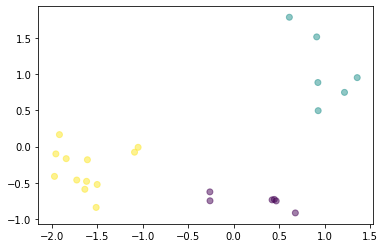

In [24]:
# Make a scatter plot of xs and ys, using labels to define the colors
plt.scatter(xs, ys, c=labels, alpha=0.5)


In [28]:
# Assign the cluster centers: centroids
centroids = model.cluster_centers_

# Assign the columns of centroids: centroids_x, centroids_y
centroids_x = centroids[:,0]
centroids_y = centroids[:,1]

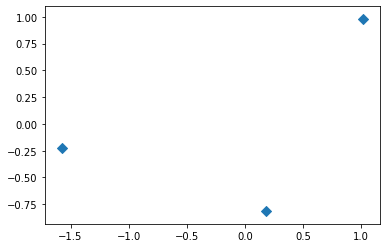

In [29]:
# Make a scatter plot of centroids_x and centroids_y
plt.scatter(centroids_x, centroids_y, marker='D', s=50)
plt.show()


In [32]:
seeds = pd.read_csv('seeds.csv')
print(seeds.head())


   15.26  14.84   0.871  5.763  3.312  2.221   5.22    1
0  14.88  14.57  0.8811  5.554  3.333  1.018  4.956  1.0
1  14.29  14.09  0.9050  5.291  3.337  2.699  4.825  1.0
2  13.84  13.94  0.8955  5.324  3.379  2.259  4.805  1.0
3  16.14  14.99  0.9034  5.658  3.562  1.355  5.175  1.0
4  14.38  14.21  0.8951  5.386  3.312  2.462  4.956  1.0


In [38]:
samples = seeds.iloc[:, list(range(5)) + [-2]]
samples.head()

,15.26,14.84,0.871,5.763,3.312,5.22
0,14.88,14.57,0.8811,5.554,3.333,4.956
1,14.29,14.09,0.9050,5.291,3.337,4.825
2,13.84,13.94,0.8955,5.324,3.379,4.805
3,16.14,14.99,0.9034,5.658,3.562,5.175
4,14.38,14.21,0.8951,5.386,3.312,4.956


In [41]:
# Drop missing values and print shape of new DataFrame
samples = samples.dropna()
samples.head()

,15.26,14.84,0.871,5.763,3.312,5.22
0,14.88,14.57,0.8811,5.554,3.333,4.956
1,14.29,14.09,0.9050,5.291,3.337,4.825
2,13.84,13.94,0.8955,5.324,3.379,4.805
3,16.14,14.99,0.9034,5.658,3.562,5.175
4,14.38,14.21,0.8951,5.386,3.312,4.956


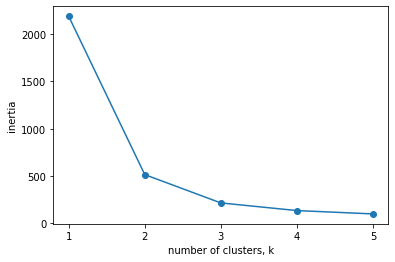

In [42]:
ks = range(1, 6)
inertias = []

for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k)
    
    # Fit model to samples
    model.fit(samples)
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
# Plot ks vs inertias
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()


# Evaluating the cluster of seed grain

In [43]:
# Create a KMeans model with 3 clusters: model
model = KMeans(n_clusters=3)

# Use fit_predict to fit model and obtain cluster labels: labels
labels = model.fit_predict(samples)


In [ ]:
# CANNOT RUN THIS WITHOUT EXTRA DATA
# Create a DataFrame with clusters and varieties as columns: df
df = pd.DataFrame({'labels': labels, 'varieties': varieties})

# Create crosstab: ct
ct = pd.crosstab(df['labels'], df['varieties'])

# Display ct
print(ct)


# Wine Dataset

In [45]:
wine = pd.read_csv('wine.csv')
print(wine.head())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
4                 47.0                 186.0   0.9956  3.19       0.40   

   alcohol  quality  
0      8.8        6  
1      9.5        6  
2     10.1        6 

In [46]:
from sklearn.preprocessing import StandardScaler

In [48]:
scaler = StandardScaler()

In [49]:
scaler.fit(wine)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [50]:
StandardScaler(copy=True,with_mean = True, with_std=True)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [53]:
wine_scaled = scaler.transform(wine)
wine_scaled[:10]

array([[ 1.72096961e-01, -8.17699008e-02,  2.13280202e-01,
         2.82134917e+00, -3.53550004e-02,  5.69931577e-01,
         7.44565035e-01,  2.33151201e+00, -1.24692128e+00,
        -3.49184257e-01, -1.39315246e+00,  1.37870140e-01],
       [-6.57501128e-01,  2.15895632e-01,  4.80011213e-02,
        -9.44765273e-01,  1.47747079e-01, -1.25301866e+00,
        -1.49684624e-01, -9.15417164e-03,  7.40028640e-01,
         1.34184656e-03, -8.24275678e-01,  1.37870140e-01],
       [ 1.47575110e+00,  1.74519434e-02,  5.43838363e-01,
         1.00282190e-01,  1.93522599e-01, -3.12141119e-01,
        -9.73335626e-01,  3.58664800e-01,  4.75101984e-01,
        -4.36815783e-01, -3.36667007e-01,  1.37870140e-01],
       [ 4.09124986e-01, -4.78657278e-01, -1.17277959e-01,
         4.15768217e-01,  5.59726758e-01,  6.87541270e-01,
         1.12109121e+00,  5.25855242e-01,  1.14803354e-02,
        -7.87341887e-01, -4.99203231e-01,  1.37870140e-01],
       [ 4.09124986e-01, -4.78657278e-01, -1.1727795

# Make Pipeline

In [55]:
# Perform the necessary imports
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [56]:
# Create scaler: scaler
scaler = StandardScaler()

# Create KMeans instance: kmeans
kmeans = KMeans(n_clusters=4)

# Create pipeline: pipeline
pipeline = make_pipeline(scaler, kmeans)


In [58]:
# Import pandas
import pandas as pd

# Fit the pipeline to samples
pipeline.fit(wine)

# Calculate the cluster labels: labels
labels = pipeline.predict(wine)

In [ ]:
# Create a DataFrame with labels and species as columns: df
df = pd.DataFrame({'labels': labels, 'varieties':varieties})

# Create crosstab: ct
ct = pd.crosstab(wine['labels'], df['varieties'])

# Display ct
print(ct)


# Normalizer

In [62]:
# Import Normalizer
from sklearn.preprocessing import Normalizer

# Create a normalizer: normalizer
normalizer = Normalizer()

# Create a KMeans model with 10 clusters: kmeans
kmeans = KMeans(n_clusters=10)

In [63]:
# Make a pipeline chaining normalizer and kmeans: pipeline
pipeline = make_pipeline(normalizer, kmeans)

# Fit pipeline to the daily price movements
pipeline.fit(wine)


Pipeline(memory=None,
         steps=[('normalizer', Normalizer(copy=True, norm='l2')),
                ('kmeans',
                 KMeans(algorithm='auto', copy_x=True, init='k-means++',
                        max_iter=300, n_clusters=10, n_init=10, n_jobs=None,
                        precompute_distances='auto', random_state=None,
                        tol=0.0001, verbose=0))],
         verbose=False)

In [ ]:
# Import pandas
import pandas as pd

# Predict the cluster labels: labels
labels = pipeline.predict(movements)

# Create a DataFrame aligning labels and companies: df
df = pd.DataFrame({'labels': labels, 'companies': companies})

# Display df sorted by cluster label
print(df.sort_values('labels'))